In [86]:
import torch
import os
import torchvision.transforms as transforms
from PIL import Image
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Let's gradually add some noise to this image
# But first we need to convert it to a tensor

In [88]:
def imageToTensor(img_path):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')

    img = Image.open(img_path)
    img = img.convert("RGB")  # remove alpha channel, if any

    # preprocessing steps
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])  # Normalize with the VGG16 mean and std
    ])

    # apply the preprocessing to image
    image_tensor = preprocess(img)
    return image_tensor

In [89]:
# Simple linear schedule
def getBetaFromSchedule(time):
    b1 = 1e-4
    bt = 2e-2

    return (bt-b1)/1000 * time


def forwardprocess(image, time):
    """
    This function implements the forward pass of diffusion process, takes an image and adds noise to it.
    Bt comes from a schedule
    """
    
    alpha_bar = 1
    for t in range(time):
        alpha_bar = alpha_bar*(1-getBetaFromSchedule(t))

    noisy_image = sqrt(alpha_bar)*image + sqrt(1-alpha_bar)*torch.randn_like(image)
    noise = noisy_image - image

    return noisy_image, noise

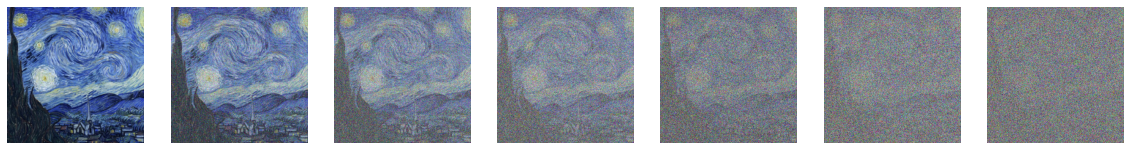

In [90]:
img_tensor = imageToTensor(("/Users/shubhamsingh/Desktop/starry_night.png"))

noisy_image1, _ = forwardprocess(img_tensor, 100)
noisy_image2, _ = forwardprocess(img_tensor, 200)
noisy_image3, _ = forwardprocess(img_tensor, 300)
noisy_image4, _ = forwardprocess(img_tensor, 400)
noisy_image5, _ = forwardprocess(img_tensor, 500)
noisy_image6, _ = forwardprocess(img_tensor, 600)

# 7 image tensors with shape (C, H, W)
images = [
    img_tensor,
    noisy_image1,
    noisy_image2,
    noisy_image3,
    noisy_image4,
    noisy_image5,
    noisy_image6
]

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 5))  # 1 row, 4 columns

for i, img_tensor in enumerate(images):
    image_np = img_tensor.numpy()

    # Normalize the numpy array if necessary (assuming values are in [0, 1])
    image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
    
    img = image_np.transpose(1, 2, 0)
    
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()